 #  Airfoil Self-Noise Data Set 
 
 Salem Ameen, PhD student at Salford University

# Load the data

In [1]:
# import python packages
import pandas as pd
import pandas
#import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import numpy
# allow plots to appear directly in the notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
# fix random seed for reproducibility
plt.rcParams['figure.figsize'] = (15, 6)
%matplotlib inline

 Down load data from the site
 There are multiple spaces used as a delimiter, that's why it's not working when you use a single space as a delimiter (sep=' ')




data = pandas.read_csv(url, sep=',', header = None)

In [65]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year','origin','name']
feature_names = names
data = pd.read_csv(url, sep='\s+', names = names)

In [66]:
data.shape

(398, 9)

In [67]:
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


In [5]:
dataset = data
df = data

In [6]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
pd.isnull(df).any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

In [9]:
pd.isnull(df).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [10]:
shape = data.shape
print(shape)

(398, 9)


In [11]:
types = data.dtypes
print(types)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [12]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [13]:
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
description = data.describe()
print(description)

           mpg  cylinders  displacement    weight  acceleration     year   origin
count  398.000    398.000       398.000   398.000       398.000  398.000  398.000
mean    23.515      5.455       193.426  2970.425        15.568   76.010    1.573
std      7.816      1.701       104.270   846.842         2.758    3.698    0.802
min      9.000      3.000        68.000  1613.000         8.000   70.000    1.000
25%     17.500      4.000       104.250  2223.750        13.825   73.000    1.000
50%     23.000      4.000       148.500  2803.500        15.500   76.000    1.000
75%     29.000      8.000       262.000  3608.000        17.175   79.000    2.000
max     46.600      8.000       455.000  5140.000        24.800   82.000    3.000


In [14]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000,398.000,398.000,398.000,398.000,398.000,398.000
mean,23.515,5.455,193.426,2970.425,15.568,76.010,1.573
std,7.816,1.701,104.270,846.842,2.758,3.698,0.802
min,9.000,3.000,68.000,1613.000,8.000,70.000,1.000
25%,17.500,4.000,104.250,2223.750,13.825,73.000,1.000
50%,23.000,4.000,148.500,2803.500,15.500,76.000,1.000
75%,29.000,8.000,262.000,3608.000,17.175,79.000,2.000
max,46.600,8.000,455.000,5140.000,24.800,82.000,3.000


In [15]:
class_counts = data.groupby('mpg').size()
print(class_counts)

mpg
9.0      1
10.0     2
11.0     4
12.0     6
13.0    20
14.0    19
14.5     1
15.0    16
15.5     5
16.0    13
16.2     1
16.5     3
16.9     1
17.0     7
17.5     5
17.6     2
17.7     1
18.0    17
18.1     2
18.2     1
18.5     3
18.6     1
19.0    12
19.1     1
19.2     3
19.4     2
19.8     1
19.9     1
20.0     9
20.2     4
        ..
34.1     2
34.2     1
34.3     1
34.4     1
34.5     2
34.7     1
35.0     2
35.1     1
35.7     1
36.0     6
36.1     2
36.4     1
37.0     3
37.2     1
37.3     1
37.7     1
38.0     4
38.1     1
39.0     1
39.1     1
39.4     1
40.8     1
40.9     1
41.5     1
43.1     1
43.4     1
44.0     1
44.3     1
44.6     1
46.6     1
dtype: int64


In [16]:
skew = data.skew()
print(skew)

mpg             0.457
cylinders       0.527
displacement    0.720
weight          0.531
acceleration    0.279
year            0.012
origin          0.924
dtype: float64


CRIM, CHAS and ZN have positive skwed which may be of the outlier on the data (highest value)

B has big negative skwed becuase of the the smallest value

## Corelation of the data
More Information in the following Link
http://www.statisticssolutions.com/correlation-pearson-kendall-spearman/

In [17]:
correlations = data.corr(method='pearson')
print(correlations)

                mpg  cylinders  displacement  weight  acceleration   year  origin
mpg           1.000     -0.775        -0.804  -0.832         0.420  0.579   0.563
cylinders    -0.775      1.000         0.951   0.896        -0.505 -0.349  -0.563
displacement -0.804      0.951         1.000   0.933        -0.544 -0.370  -0.609
weight       -0.832      0.896         0.933   1.000        -0.417 -0.307  -0.581
acceleration  0.420     -0.505        -0.544  -0.417         1.000  0.288   0.206
year          0.579     -0.349        -0.370  -0.307         0.288  1.000   0.181
origin        0.563     -0.563        -0.609  -0.581         0.206  0.181   1.000


In [18]:
df.corr(method='pearson')

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000,-0.775,-0.804,-0.832,0.420,0.579,0.563
cylinders,-0.775,1.000,0.951,0.896,-0.505,-0.349,-0.563
displacement,-0.804,0.951,1.000,0.933,-0.544,-0.370,-0.609
weight,-0.832,0.896,0.933,1.000,-0.417,-0.307,-0.581
acceleration,0.420,-0.505,-0.544,-0.417,1.000,0.288,0.206
year,0.579,-0.349,-0.370,-0.307,0.288,1.000,0.181
origin,0.563,-0.563,-0.609,-0.581,0.206,0.181,1.000


In [19]:
pearson = df.corr(method='pearson')
# assume mpg attr is the last, then remove corr with itself
corr_with_mpg = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_mpg.sort(ascending=False)

/home/salm/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [20]:
# correlation to the mpg or how much inflonce the taget 
corr_with_mpg[abs(corr_with_mpg).argsort()[::-1]]

displacement   -0.609
weight         -0.581
mpg             0.563
cylinders      -0.563
acceleration    0.206
year            0.181
Name: origin, dtype: float64

In [21]:
attrs = pearson.iloc[:-1,:-1] # all except mpg
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

In [22]:
unique_important_corrs

,attribute pair,correlation
4,"(cylinders, displacement)",0.951
5,"(displacement, weight)",0.933
8,"(cylinders, weight)",0.896
3,"(mpg, weight)",-0.832
7,"(displacement, mpg)",-0.804
0,"(cylinders, mpg)",-0.775
6,"(mpg, year)",0.579
1,"(acceleration, displacement)",-0.544
2,"(acceleration, cylinders)",-0.505


In [23]:
%timeit df.corr(method='pearson')

1000 loops, best of 3: 320 µs per loop


In [24]:
df.corr(method='spearman')

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000,-0.822,-0.856,-0.875,0.439,0.573,0.581
cylinders,-0.822,1.000,0.912,0.873,-0.474,-0.335,-0.605
displacement,-0.856,0.912,1.000,0.946,-0.497,-0.305,-0.707
weight,-0.875,0.873,0.946,1.000,-0.405,-0.277,-0.628
acceleration,0.439,-0.474,-0.497,-0.405,1.000,0.275,0.221
year,0.573,-0.335,-0.305,-0.277,0.275,1.000,0.167
origin,0.581,-0.605,-0.707,-0.628,0.221,0.167,1.000


In [25]:
pearson = df.corr(method='spearman')
# assume mpg attr is the last, then remove corr with itself
corr_with_mpg = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_mpg.sort(ascending=False)

/home/salm/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [26]:
corr_with_mpg[abs(corr_with_mpg).argsort()[::-1]]

displacement   -0.707
weight         -0.628
cylinders      -0.605
mpg             0.581
acceleration    0.221
year            0.167
Name: origin, dtype: float64

In [27]:
attrs = pearson.iloc[:-1,:-1] # all except mpg
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

In [28]:
# correlations between attribute pairs
unique_important_corrs

,attribute pair,correlation
6,"(displacement, weight)",0.946
2,"(cylinders, displacement)",0.912
0,"(mpg, weight)",-0.875
5,"(cylinders, weight)",0.873
3,"(displacement, mpg)",-0.856
4,"(cylinders, mpg)",-0.822
1,"(mpg, year)",0.573


In [29]:
%timeit df.corr(method='spearman')

100 loops, best of 3: 1.81 ms per loop


In [30]:
df.corr(method='kendall')

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000,-0.686,-0.680,-0.694,0.301,0.414,0.467
cylinders,-0.686,1.000,0.795,0.735,-0.367,-0.274,-0.552
displacement,-0.680,0.795,1.000,0.801,-0.352,-0.219,-0.570
weight,-0.694,0.735,0.801,1.000,-0.269,-0.197,-0.496
acceleration,0.301,-0.367,-0.352,-0.269,1.000,0.196,0.173
year,0.414,-0.274,-0.219,-0.197,0.196,1.000,0.137
origin,0.467,-0.552,-0.570,-0.496,0.173,0.137,1.000


In [31]:
pearson = df.corr(method='kendall')
# assume mpg attr is the last, then remove corr with itself
corr_with_mpg = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_mpg.sort(ascending=False)

/home/salm/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [32]:
corr_with_mpg[abs(corr_with_mpg).argsort()[::-1]]

displacement   -0.570
cylinders      -0.552
weight         -0.496
mpg             0.467
acceleration    0.173
year            0.137
Name: origin, dtype: float64

In [33]:
attrs = pearson.iloc[:-1,:-1] # all except mpg
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

In [34]:
unique_important_corrs

,attribute pair,correlation
3,"(displacement, weight)",0.801
1,"(cylinders, displacement)",0.795
2,"(cylinders, weight)",0.735
5,"(mpg, weight)",-0.694
4,"(cylinders, mpg)",-0.686
0,"(displacement, mpg)",-0.680


In [35]:
%timeit df.corr(method='kendall')

10 loops, best of 3: 102 ms per loop


# Visulize the data

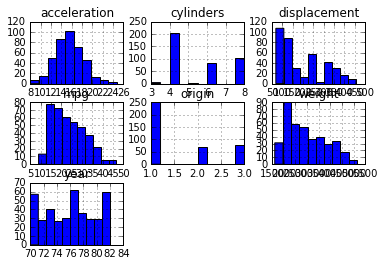

In [36]:
data.hist()
plt.rcParams['figure.figsize'] = (20, 15)
plt.show()

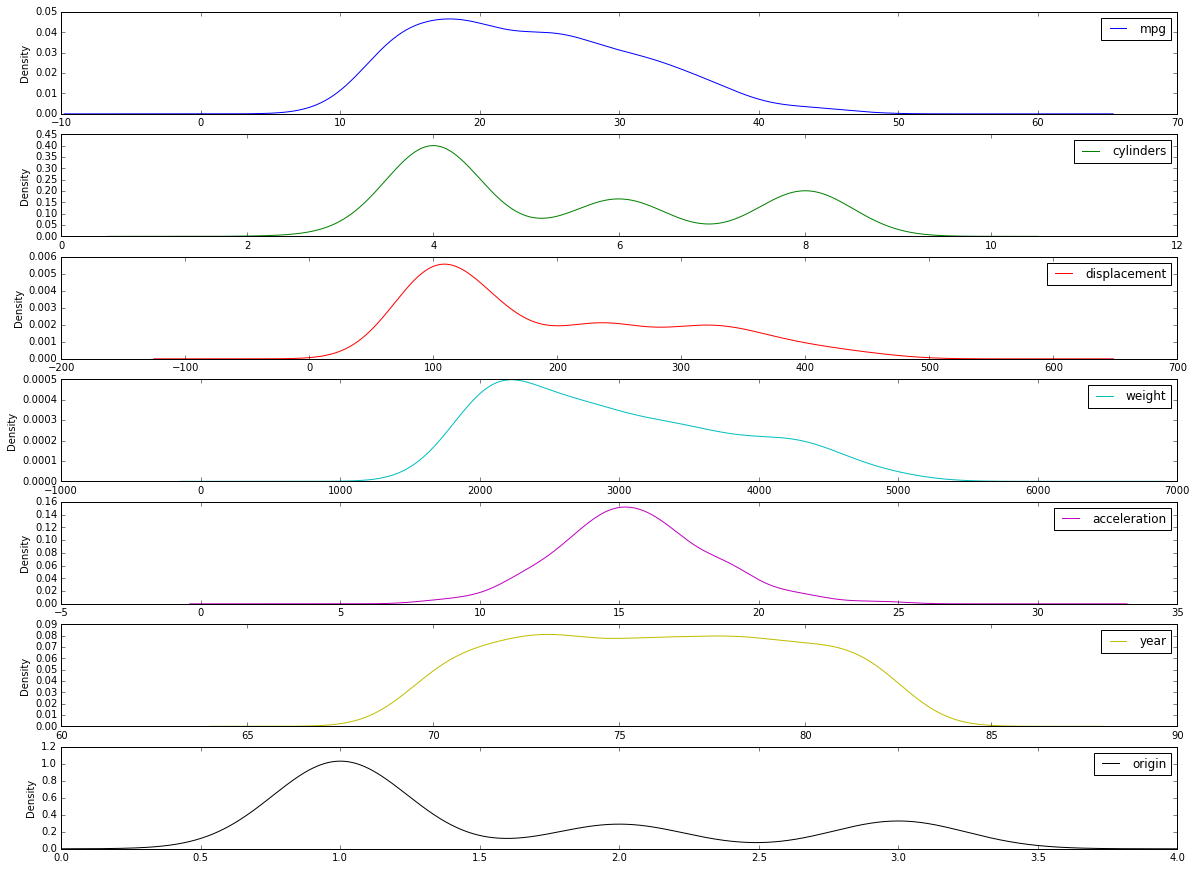

In [37]:
data.plot(kind='density', subplots=True,  sharex=False)
plt.show()

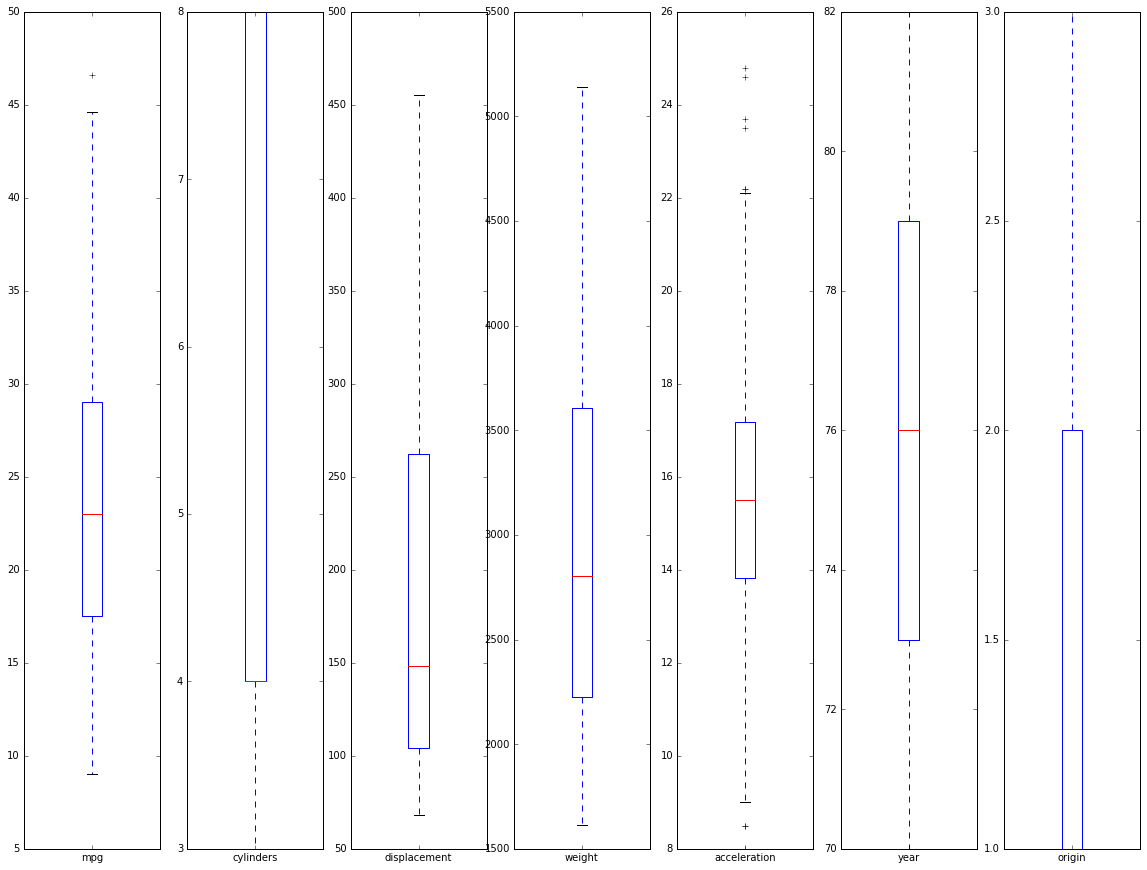

In [38]:
data.plot(kind='box', subplots=True,  sharex=False, sharey=False)
plt.show()

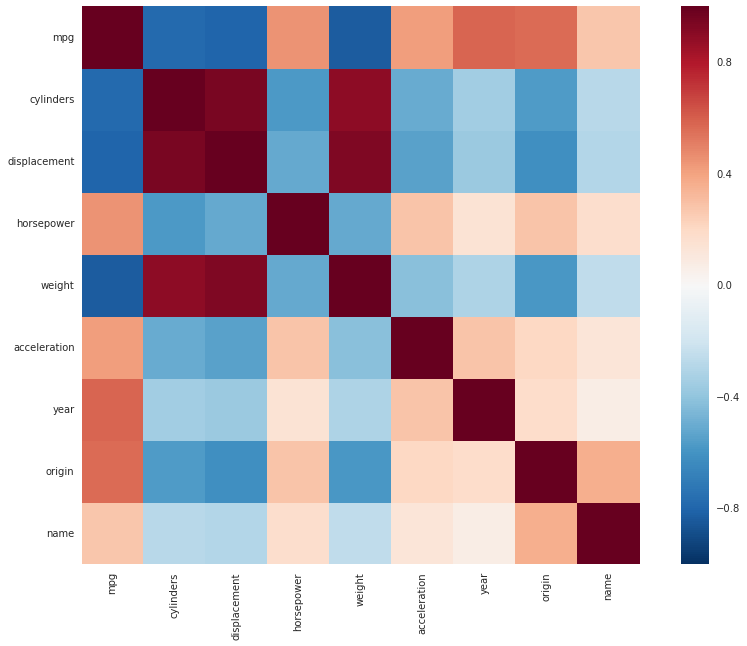

In [40]:
# Encode the categorical features as numbers
from sklearn import preprocessing
import seaborn as sns
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
plt.rcParams['figure.figsize'] = (15, 10)
encoded_data, _ = number_encode_features(data)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

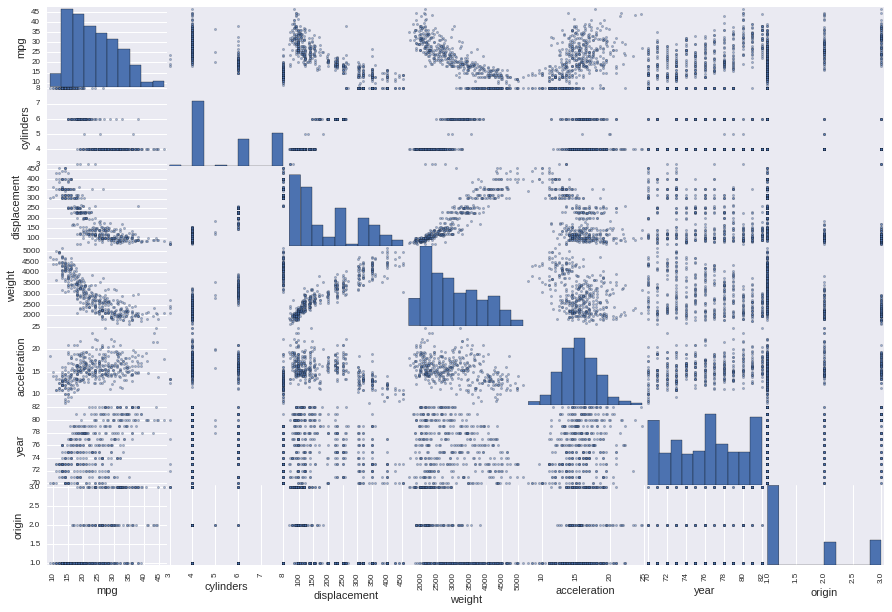

In [41]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

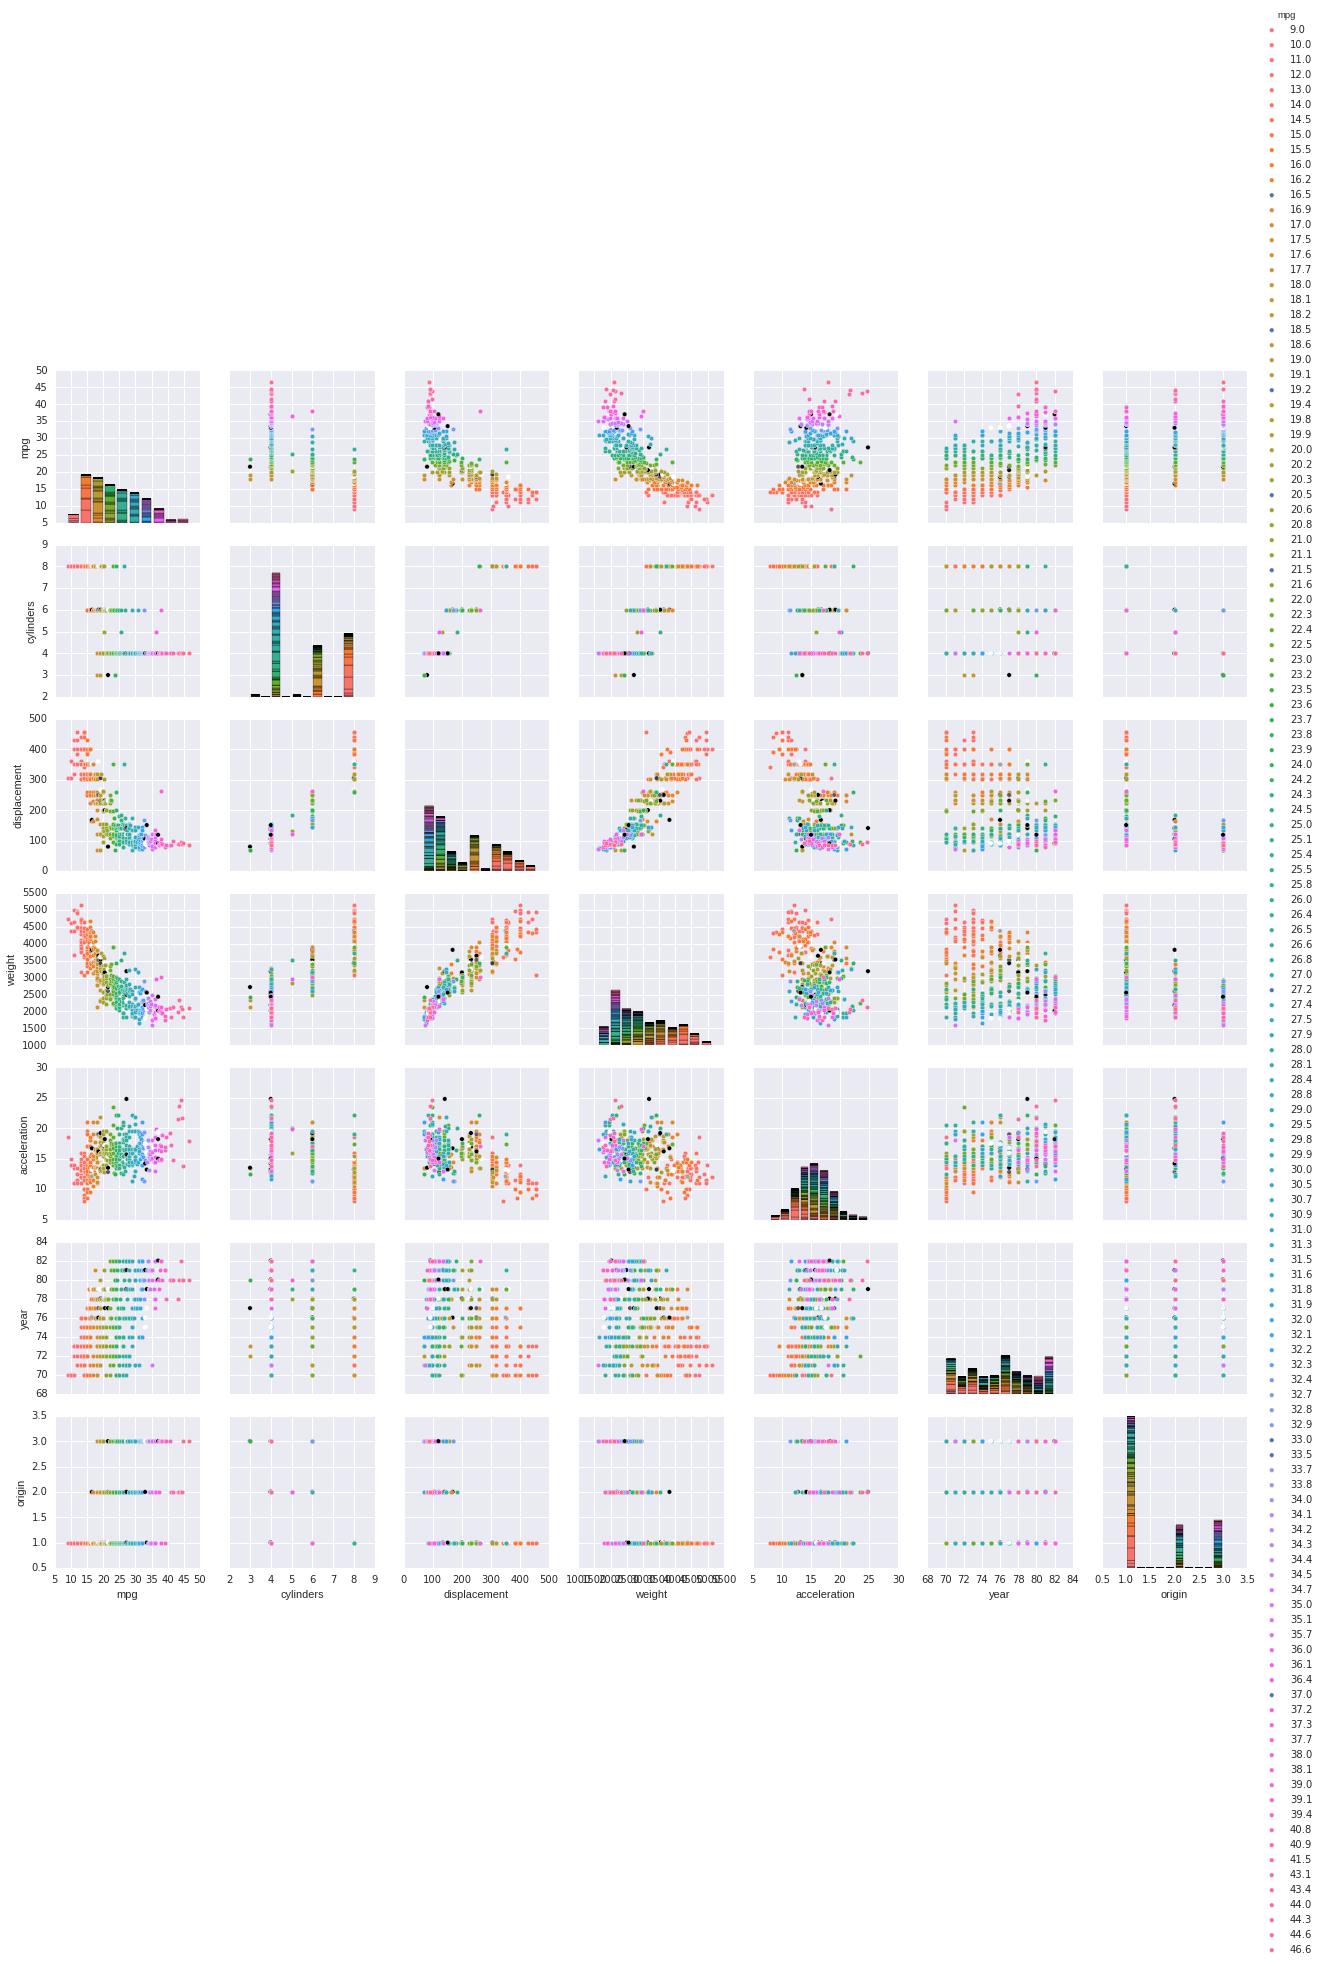

In [42]:
import seaborn as sns
sns.pairplot(data, hue='mpg')

### Attribute histograms

(array([ 13.,  78.,  73.,  61.,  54.,  48.,  38.,  22.,   5.,   6.]),
 array([  9.  ,  12.76,  16.52,  20.28,  24.04,  27.8 ,  31.56,  35.32,
         39.08,  42.84,  46.6 ]),
 <a list of 10 Patch objects>)

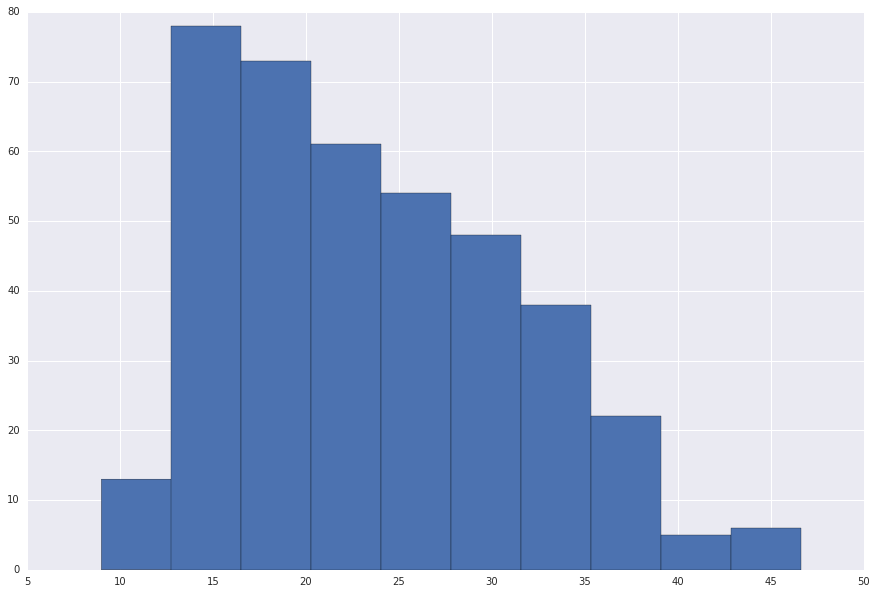

In [49]:
import matplotlib.pyplot as plt
attr = df['mpg']
plt.hist(attr)

(array([  1.,   2.,   4.,   6.,   0.,  20.,  19.,  17.,   5.,  17.,   8.,
         25.,   7.,  18.,  15.,  15.,   5.,  13.,  11.,  17.,   4.,  16.,
         15.,  14.,   5.,  13.,   9.,  12.,   3.,  11.,  12.,   8.,   5.,
          9.,   4.,   7.,   3.,   5.,   6.,   1.,   2.,   0.,   2.,   1.,
          0.,   2.,   2.,   1.,   0.,   1.]),
 array([  9.   ,   9.752,  10.504,  11.256,  12.008,  12.76 ,  13.512,
         14.264,  15.016,  15.768,  16.52 ,  17.272,  18.024,  18.776,
         19.528,  20.28 ,  21.032,  21.784,  22.536,  23.288,  24.04 ,
         24.792,  25.544,  26.296,  27.048,  27.8  ,  28.552,  29.304,
         30.056,  30.808,  31.56 ,  32.312,  33.064,  33.816,  34.568,
         35.32 ,  36.072,  36.824,  37.576,  38.328,  39.08 ,  39.832,
         40.584,  41.336,  42.088,  42.84 ,  43.592,  44.344,  45.096,
         45.848,  46.6  ]),
 <a list of 50 Patch objects>)

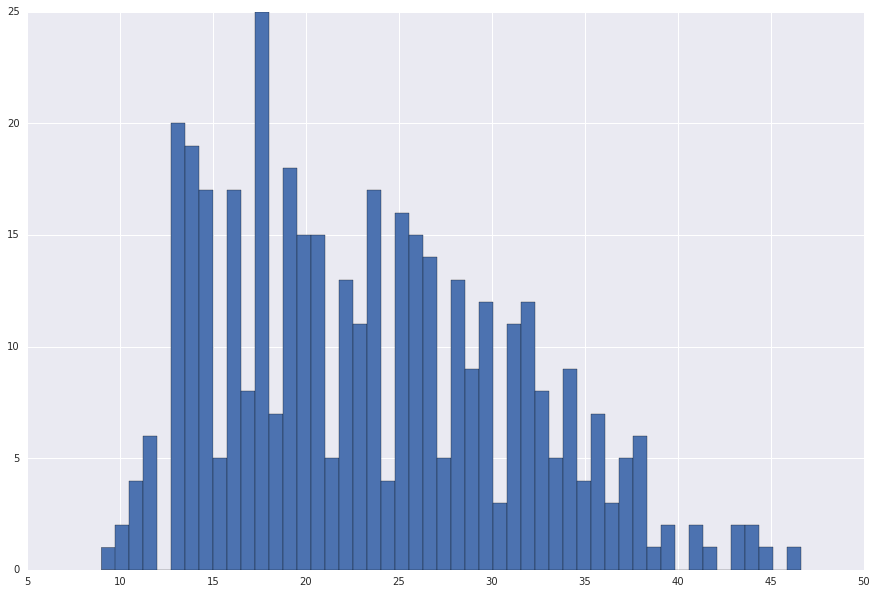

In [50]:
plt.hist(attr, bins=50)

In [51]:
#sns.displot(attr)

In [52]:
#sns.countplot(attr)

# Prepare the data for classification

from sklearn import preprocessing
# for training data
dataset = data.values
X = dataset[:,0:13].astype(float)
Y = dataset[:,13]
features = preprocessing.scale(X)
mpg = Y

# Make developement dataset for genrilization and final testing
from sklearn.cross_validation import train_test_split
# Extracting 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    features, mpg, test_size=0.20, random_state=0)

print 'Number of training examples',len(X_train)
print 'Number of validation examples',len(X_test)

## Preproccing

from sklearn import preprocessing
# normalize the data attributes
#X_train = preprocessing.normalize(X_train)
#X_test = preprocessing.normalize(X_test)
# standardize the data attributes
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

np.save('./data/X_train', X_train)
np.save('./data/y_train', y_train)
np.save('./data/X_test', X_test)
np.save('./data/y_test', y_test)